<a href="https://www.kaggle.com/code/coltoneastland/space-titanic-soft-voting?scriptVersionId=114438147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
training = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
example = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv') #Returns columns ['PassengerId', 'Transported']

training['train_test'] = 1
test['train_test'] = 0

all_data = pd.concat([training, test])
all_data.describe

<bound method NDFrame.describe of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
4272     9266_02      Earth      True  G/1496/S    TRAPPIST-1e  34.0  False   
4273     9269_01      Earth     False       NaN    TRAPPIST-1e  42.0  False   
4274     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
4275     9273_01     Europa     False   D/297/P            NaN   NaN  False   
4276     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

      RoomService

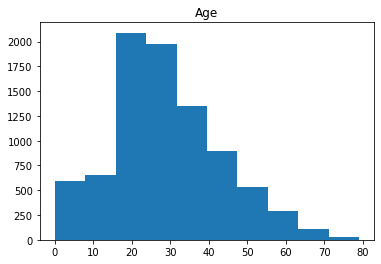

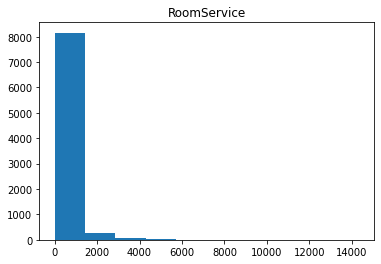

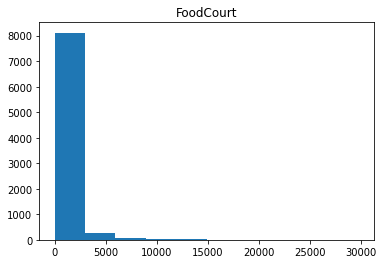

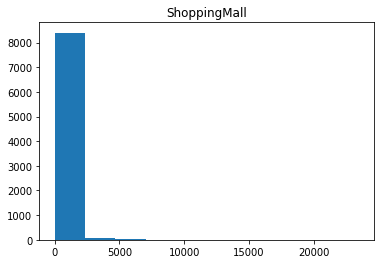

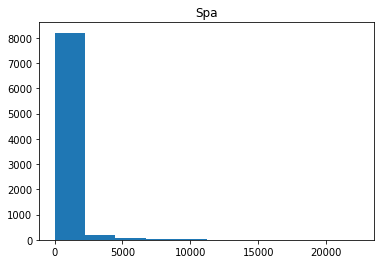

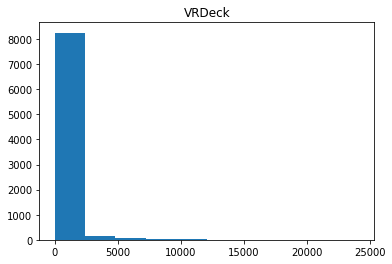

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


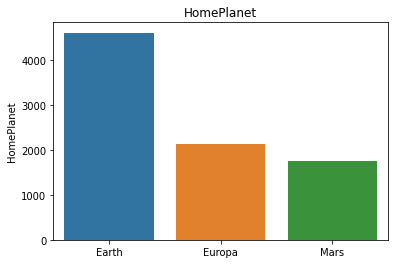

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


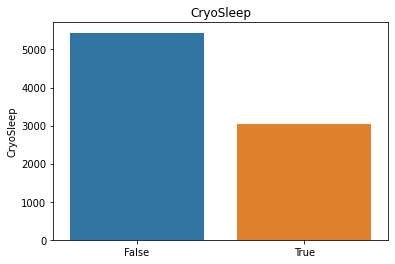

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


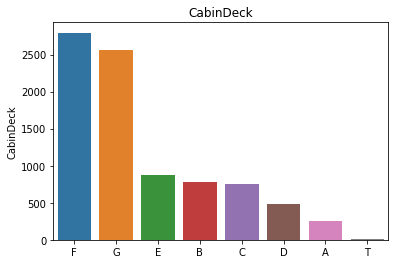

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


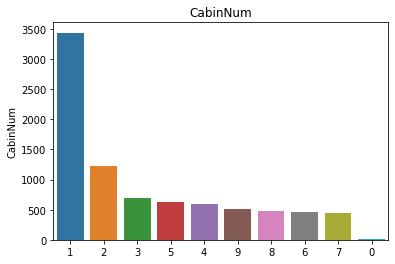

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


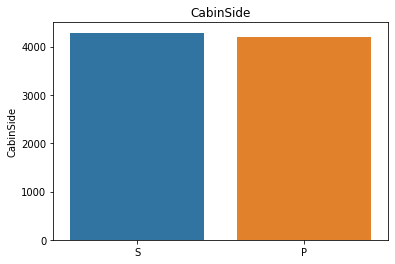

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


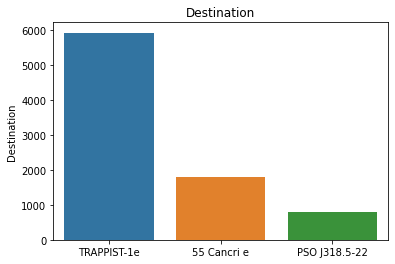

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


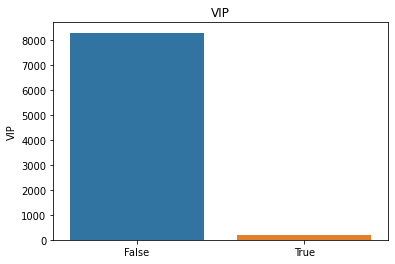

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

training['CabinDeck'] = training['Cabin'].str.split('/').str[0]
training['CabinNum'] = training['Cabin'].str.split('/').str[1].str[0]
training['CabinSide'] = training['Cabin'].str.split('/').str[2].str[0]

df_num = training[['Age', 'RoomService','FoodCourt','ShoppingMall','Spa', 'VRDeck']]
df_cat = training[['HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNum', 'CabinSide', 'Destination', 'VIP']]



for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()
    
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()
    

In [4]:
training.CabinDeck = training.CabinDeck.fillna('F')
print(training['CabinDeck'])
training.CabinNum = training.CabinNum.fillna(1)
print(training['CabinNum'])
training.CabinSide = training.CabinSide.fillna('S')
print(training['CabinSide'])


0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: CabinDeck, Length: 8693, dtype: object
0       0
1       0
2       0
3       0
4       1
       ..
8688    9
8689    1
8690    1
8691    6
8692    6
Name: CabinNum, Length: 8693, dtype: object
0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: CabinSide, Length: 8693, dtype: object


In [5]:
print(pd.pivot_table(training, index = 'Transported', columns = 'CabinDeck', values = 'PassengerId', aggfunc = 'count'))
print(pd.pivot_table(training, index = 'Transported', columns = 'CabinNum', values = 'PassengerId', aggfunc = 'count'))
print(pd.pivot_table(training, index = 'Transported', columns = 'CabinSide', values = 'PassengerId', aggfunc = 'count'))

print(pd.pivot_table(training, index = 'Transported', columns = 'Destination', values = 'PassengerId', aggfunc = 'count'))
print(pd.pivot_table(training, index = 'Transported', columns = 'HomePlanet', values = 'PassengerId', aggfunc = 'count'))
print(pd.pivot_table(training, index = 'Transported', columns = 'VIP', values = 'PassengerId', aggfunc = 'count'))

CabinDeck      A    B    C    D    E     F     G  T
Transported                                        
False        129  207  239  271  563  1664  1238  4
True         127  572  508  207  313  1329  1321  1
CabinNum       1   0     1    2    3    4    5    6    7    8    9
Transported                                                       
False         99  12  1735  560  377  357  340  231  207  213  184
True         100   6  1704  659  309  233  286  238  245  273  325
CabinSide       P     S
Transported            
False        2308  2007
True         1898  2480
Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                702            395         3128
True                1098            401         2787
HomePlanet   Earth  Europa  Mars
Transported                     
False         2651     727   839
True          1951    1404   920
VIP          False  True
Transported             
False         4093   123
True     

Index(['Age', 'norm_RoomService', 'norm_FoodCourt', 'norm_ShoppingMall',
       'norm_Spa', 'norm_VRDeck', 'train_test', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_False', 'CryoSleep_True', 'VIP_False', 'VIP_True',
       'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C', 'CabinDeck_D',
       'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G', 'CabinDeck_T',
       'CabinNum_1', 'CabinNum_0', 'CabinNum_2', 'CabinNum_3', 'CabinNum_4',
       'CabinNum_5', 'CabinNum_6', 'CabinNum_7', 'CabinNum_8', 'CabinNum_9',
       'CabinSide_P', 'CabinSide_S'],
      dtype='object')

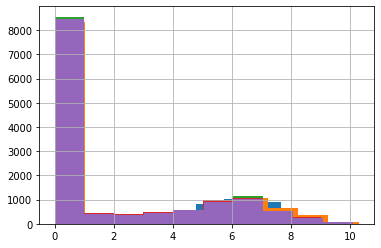

In [6]:
all_data['CabinDeck'] = all_data['Cabin'].str.split('/').str[0]
all_data['CabinNum'] = all_data['Cabin'].str.split('/').str[1].str[0]
all_data['CabinSide'] = all_data['Cabin'].str.split('/').str[2].str[0]

#all_data.dropna(subset=['Transported '], inplace=True) #Can't be dropping this, the train_test split depends on it
all_data.CabinDeck = all_data.CabinDeck.fillna('F')
all_data.CabinNum = all_data.CabinNum.fillna(1)
all_data.CabinSide = all_data.CabinSide.fillna('S')
#all_data.HomePlanet = all_data.HomePlanet.fillna('Earth')
#all_data.dropna(subset=['HomePlanet'], inplace=True)
all_data.CryoSleep = all_data.CryoSleep.fillna('False')
#all_data.Destination = all_data.Destination.fillna('TRAPPIST-1e')
#all_data.dropna(subset=['Destination'], inplace=True)
all_data.Age = all_data.Age.fillna(all_data.Age.median())
#all_data.VIP = all_data.VIP.fillna('False')
#all_data.dropna(subset=['VIP'], inplace=True)
all_data.RoomService = all_data.RoomService.fillna(all_data.RoomService.mean())
all_data.FoodCourt = all_data.FoodCourt.fillna(all_data.FoodCourt.mean())
all_data.ShoppingMall = all_data.ShoppingMall.fillna(all_data.ShoppingMall.mean())
all_data.Spa = all_data.Spa.fillna(all_data.Spa.mean())
all_data.VRDeck = all_data.VRDeck.fillna(all_data.VRDeck.mean())

all_data['norm_RoomService'] = np.log(all_data.RoomService+1)
all_data['norm_FoodCourt'] = np.log(all_data.FoodCourt+1)
all_data['norm_ShoppingMall'] = np.log(all_data.ShoppingMall+1)
all_data['norm_Spa'] = np.log(all_data.Spa+1)
all_data['norm_VRDeck'] = np.log(all_data.VRDeck+1)

all_data['norm_RoomService'].hist()
all_data['norm_FoodCourt'].hist()
all_data['norm_ShoppingMall'].hist()
all_data['norm_Spa'].hist()
all_data['norm_VRDeck'].hist()


all_data.isna().sum()

all_dummies = pd.get_dummies(all_data[['HomePlanet','Destination', 'CryoSleep', 'Age','VIP',
                                       'norm_RoomService','norm_FoodCourt','norm_ShoppingMall','norm_Spa','norm_VRDeck',
                                       'CabinDeck','CabinNum','CabinSide','train_test']])
all_dummies = all_dummies.loc[:,~all_dummies.columns.duplicated()]
all_dummies.columns

In [7]:
#Split into new train test
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis=1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis=1)

y_train = all_data[all_data.train_test==1].Transported
y_train.shape

(8693,)

In [8]:
#Scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled= all_dummies.copy()
all_dummies_scaled[['Age','norm_RoomService','norm_FoodCourt','norm_ShoppingMall','norm_Spa','norm_VRDeck']] = \
scale.fit_transform(all_dummies_scaled[['Age','norm_RoomService','norm_FoodCourt','norm_ShoppingMall','norm_Spa','norm_VRDeck']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis = 1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test==0].drop(['train_test'], axis = 1)

y_train = all_data[all_data.train_test==1].Transported

y_train = y_train.replace({True:1, False:0}) #Very important, target column must be a number (possibly only an integer), Booleans will cause a FitFailedWarning

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_train)

(8693, 36)
(4277, 36)
(8693,)
0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [10]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.62183908 0.75172414 0.65172414 0.75028769 0.7146145  0.70310702
 0.75373993 0.76639816 0.7721519  0.75604143]
0.7241627977725751


In [11]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.77931034 0.74712644 0.76091954 0.76754891 0.76524741 0.79056387
 0.79056387 0.7698504  0.79401611 0.76064442]
0.772579130457786


In [12]:
dt = tree.DecisionTreeClassifier(random_state=1)
cv = cross_val_score(lr,X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.77931034 0.74712644 0.76091954 0.76754891 0.76524741 0.79056387
 0.79056387 0.7698504  0.79401611 0.76064442]
0.772579130457786


In [13]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.77586207 0.73908046 0.73908046 0.73417722 0.75949367 0.75604143
 0.77790564 0.75028769 0.78135788 0.75258918]
0.7565875692763515


In [14]:
rfc = RandomForestClassifier(random_state=1)
cv = cross_val_score(rfc, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.79310345 0.75517241 0.75862069 0.76294591 0.79056387 0.78711162
 0.81703107 0.75719217 0.79401611 0.77675489]
0.7792512201896751


In [15]:
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.79655172 0.76666667 0.74022989 0.79401611 0.77675489 0.81357883
 0.8296893  0.81357883 0.81588032 0.79171461]
0.7938661164239514


In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb, X_train_scaled, y_train, cv=10)
print(cv)
print(cv.mean())

[0.79885057 0.74482759 0.75287356 0.78365938 0.78365938 0.74683544
 0.82048331 0.80322209 0.80322209 0.78596087]
0.7823594301813419


In [17]:
#from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn',knn), ('rfc',rfc),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'hard')
#cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=10)
#print(cv)
#print(cv.mean())

In [18]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn',knn), ('rfc',rfc),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft')
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=10)
print(cv)
print(cv.mean())

[0.79425287 0.78275862 0.75632184 0.78135788 0.77445339 0.81357883
 0.82508631 0.81242808 0.81472957 0.79286536]
0.794783275795934


In [19]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Transported':y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.Transported = base_submission.Transported.replace({0:False, 1:True}) #
base_submission.to_csv('submission.csv', index=False)
base_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
